# Part 1 - Building a Basic k-NN algorithm

In [105]:
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## Reading File and storing Data

In [106]:
#Reading File
os.chdir("C:/Users/karth/data/classification/")
os.getcwd()

# Reading Data, Splitting features and class in test and training Data
def getdata(filename):
    data=np.genfromtxt(filename, delimiter=",")
    return data[:,:-1]  ,  data[:,-1]
def calculate_distance(ndarray, onedarray):
    broadcastedarray=np.tile(onedarray, (len(ndarray),1))
    distance=np.sqrt(np.sum((ndarray-broadcastedarray)**2, axis=1))
    return distance


trainingFeatures, trainingClass = getdata("trainingData.csv")
testDataFeatures, testDataClass = getdata("testData.csv")

## Implementation of basic k-NN

In [107]:

accuracy_list=[]
for k in range(1,60):
    accuracy_counter=0
    for i in range(len(testDataFeatures)):
        euclidean_distance=calculate_distance(trainingFeatures,testDataFeatures[i])
        nearest_neighbours=trainingClass[np.argsort(euclidean_distance)[:k]].copy()
        mode=Counter(nearest_neighbours).most_common(1)
        if mode[0][0]==testDataClass[i]:
            accuracy_counter+=1

    
    #print(" For K={} the accuracy is {}".format(k,(accuracy_counter/len(testDataClass))))
    
    
    accuracy_list.append(accuracy_counter/len(testDataClass))
    

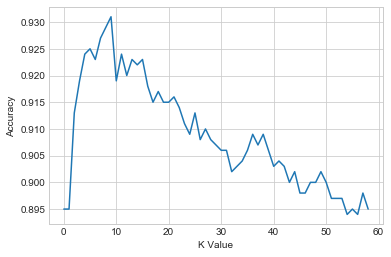

In [108]:
plt.plot(accuracy_list)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()